In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Microsoft.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,NaN,180000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/22/2017 13:55:26,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.0,NaN,135000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/22/2017 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [2]:
missing_values = df.isnull().sum()
print(missing_values)

timestamp                     0
company                       0
level                         0
title                         0
totalyearlycompensation       0
location                      0
yearsofexperience             0
yearsatcompany                0
tag                         140
basesalary                    0
stockgrantvalue               0
bonus                         0
gender                     1585
otherdetails               2301
cityid                        0
dmaid                         0
rowNumber                     0
Masters_Degree                0
Bachelors_Degree              0
Doctorate_Degree              0
Highschool                    0
Some_College                  0
Race_Asian                    0
Race_White                    0
Race_Two_Or_More              0
Race_Black                    0
Race_Hispanic                 0
Race                       3555
Education                  2919
dtype: int64


# Data Processing

In [3]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['basesalary'].replace(0, np.mean(df['basesalary']), inplace=True)
df['gender'].replace(np.nan, 'Unknown', inplace=True)
df.drop(df.iloc[:, 13:27], inplace=True, axis=1)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,135732.104532,0,0,Unknown,NaN,NaN
1,2017-06-21 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,NaN,135732.104532,0,0,Unknown,NaN,NaN
2,2017-06-22 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,NaN,180000.000000,65000,55000,Unknown,NaN,NaN
3,2017-06-22 13:55:26,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.0,NaN,135000.000000,8000,13000,Unknown,NaN,NaN
4,2017-06-22 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.0,NaN,135732.104532,0,0,Unknown,NaN,NaN


In [4]:
undesired_titles = ['Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
df = df[df['title'].apply(lambda x: x not in undesired_titles)]
# df = df.drop(['tag'], axis=1)
df = df.fillna({'company':'Unknown', 'gender':'Unknown','Race': 'Unknown', 'Education': 'Unknown'})
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,135732.104532,0,0,Unknown,Unknown,Unknown
1,2017-06-21 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,NaN,135732.104532,0,0,Unknown,Unknown,Unknown
2,2017-06-22 12:37:51,Microsoft,65,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,NaN,180000.000000,65000,55000,Unknown,Unknown,Unknown
3,2017-06-22 13:55:26,Microsoft,62,Software Engineer,156000,"Seattle, WA",4.0,4.0,NaN,135000.000000,8000,13000,Unknown,Unknown,Unknown
4,2017-06-22 23:08:16,Microsoft,59,Software Engineer,120000,"Redmond, WA",3.0,1.0,NaN,135732.104532,0,0,Unknown,Unknown,Unknown


# Correlation

In [5]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

In [6]:
df_model = df[['title','yearsofexperience','yearsatcompany','basesalary','stockgrantvalue','bonus','totalyearlycompensation']]
df_model.head()

,title,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,totalyearlycompensation
0,Software Engineer,5.0,3.0,135732.104532,0,0,157000
1,Software Engineer,8.5,8.5,135732.104532,0,0,208000
2,Software Engineering Manager,15.0,11.0,180000.000000,65000,55000,300000
3,Software Engineer,4.0,4.0,135000.000000,8000,13000,156000
4,Software Engineer,3.0,1.0,135732.104532,0,0,120000


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model['title'] = le.fit_transform(df_model['title'])

/var/folders/9b/bgvnc2sj75z3mhszv6c80qw80000gn/T/ipykernel_2543/949237972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['title'] = le.fit_transform(df_model['title'])


In [8]:
df_model['title'].value_counts()

6    3337
5     632
7     315
1     218
9     206
8     124
4     101
2      97
0      21
3      12
Name: title, dtype: int64

In [9]:
df['title'].value_counts()

Software Engineer               3337
Product Manager                  632
Software Engineering Manager     315
Data Scientist                   218
Technical Program Manager        206
Solution Architect               124
Product Designer                 101
Hardware Engineer                 97
Business Analyst                  21
Management Consultant             12
Name: title, dtype: int64

In [10]:
corr_matrix = df_model.corr()

to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            if colname not in to_drop:
                to_drop.append(colname)

df_model.drop(to_drop, axis=1, inplace=True)

/var/folders/9b/bgvnc2sj75z3mhszv6c80qw80000gn/T/ipykernel_2543/3134125425.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop(to_drop, axis=1, inplace=True)


In [11]:
df_model.head(5)

,title,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,totalyearlycompensation
0,6,5.0,3.0,135732.104532,0,0,157000
1,6,8.5,8.5,135732.104532,0,0,208000
2,7,15.0,11.0,180000.000000,65000,55000,300000
3,6,4.0,4.0,135000.000000,8000,13000,156000
4,6,3.0,1.0,135732.104532,0,0,120000


# Outlier

In [12]:
z = np.abs((df_model - df_model.mean()) / df_model.std())
outliers = z > 3
df_model = df_model[~outliers.any(axis=1)]

In [13]:
x = df_model.drop(['totalyearlycompensation'] , axis = 1).values
y = df_model['totalyearlycompensation'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30 , random_state = 42)

from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

# Linear Rgression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(x_train , y_train)
lr.score(x_train , y_train)

0.8970665413186251

In [16]:
lr.score(x_test , y_test)

0.8971508875850556

In [17]:
y_pred = lr.predict(x_test)
df_1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_1.head(10)

,Y_test,Y_pred
0,200000,198908.539380
1,132000,138654.903895
2,63000,61615.358377
3,340000,329885.075579
4,290000,289038.834931
5,151000,158146.645998
6,246000,246351.044670
7,210000,210124.822734
8,152000,157103.554736
9,152500,171984.213647


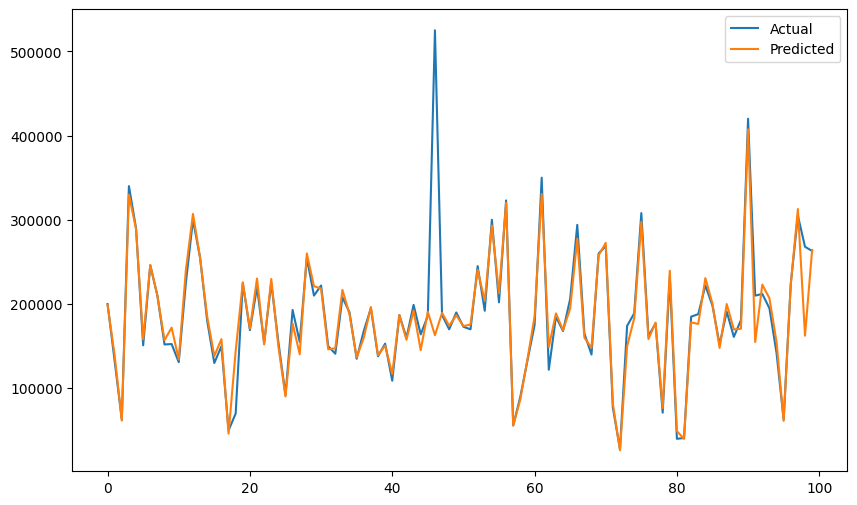

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_1[:100])
plt.legend(['Actual' , 'Predicted'])

In [19]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

521390627.7799588

In [20]:
rsq = r2_score(y_test,y_pred)
rsq

0.8971508875850556

In [21]:
df_2 = df_1.sort_values(by = ['Y_pred'], ascending = False)
df_2.head(5)

,Y_test,Y_pred
319,490000,478566.146166
501,450000,441308.344145
872,430000,430973.952381
908,450000,423548.319102
448,449000,423426.044034


# KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
knn.score(x_train , y_train)

0.944093741409559

In [23]:
knn.score(x_test , y_test)

0.9248204862273051

In [24]:
y_pred = knn.predict(x_test)
df_3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_3.head(10)

,Y_test,Y_pred
0,200000,197600.0
1,132000,132800.0
2,63000,63000.0
3,340000,336400.0
4,290000,282800.0
5,151000,147000.0
6,246000,257000.0
7,210000,197800.0
8,152000,151200.0
9,152500,173000.0


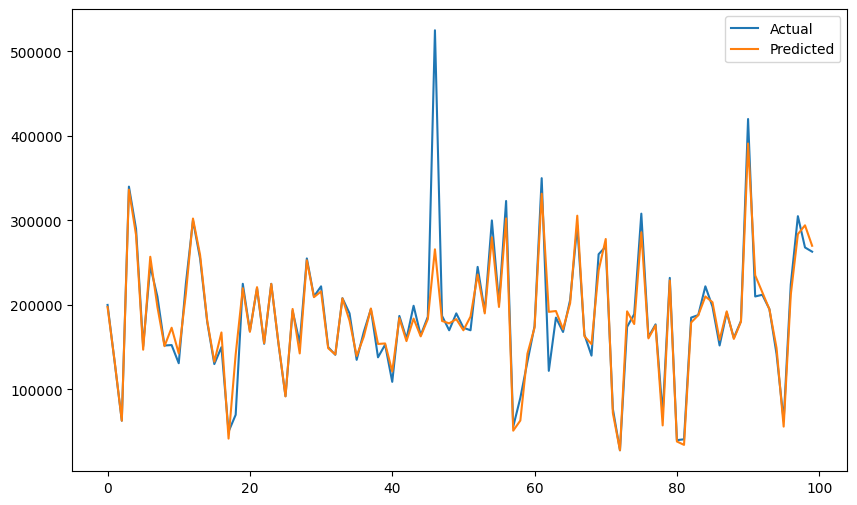

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df_3[:100])
plt.legend(['Actual' , 'Predicted'])

In [26]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

381120390.46086955

In [27]:
rsq = r2_score(y_test,y_pred)
rsq

0.9248204862273051

In [28]:
df_4 = df_3.sort_values(by = ['Y_pred'], ascending = False)
df_4.head(5)

,Y_test,Y_pred
142,440000,445000.0
319,490000,442400.0
1309,427000,440200.0
501,450000,439800.0
448,449000,438400.0


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=2, max_depth=4)
rf.fit(x_train , y_train) 
rf.score(x_train , y_train)

0.13136645962732918

In [30]:
rf.score(x_test , y_test)

0.07173913043478261

In [31]:
y_pred = rf.predict(x_test)
df_5 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_5.head(10)

,Y_test,Y_pred
0,200000,185000
1,132000,170000
2,63000,60000
3,340000,300000
4,290000,300000
5,151000,150000
6,246000,250000
7,210000,200000
8,152000,150000
9,152500,170000


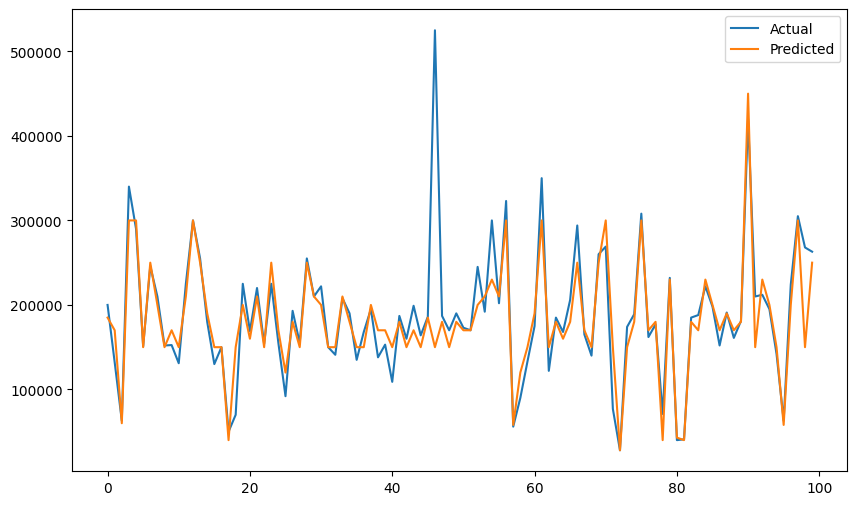

In [32]:
plt.figure(figsize=(10,6))
plt.plot(df_5[:100])
plt.legend(['Actual' , 'Predicted'])

In [33]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1020174709.8811594

In [34]:
rsq = r2_score(y_test,y_pred)
rsq

0.7987611249051229

In [35]:
df_6 = df_5.sort_values(by = ['Y_pred'], ascending = False)
df_6.head(5)

,Y_test,Y_pred
448,449000,450000
501,450000,450000
1022,420000,450000
908,450000,450000
90,420000,450000


# Neural Net

In [36]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(x_train, y_train)
mlp.score(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8957059541661476

In [37]:
mlp.score(x_test , y_test)

0.8957404328649202

In [38]:
y_pred = rf.predict(x_test)
df_7 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_7.head(10)

,Y_test,Y_pred
0,200000,185000
1,132000,170000
2,63000,60000
3,340000,300000
4,290000,300000
5,151000,150000
6,246000,250000
7,210000,200000
8,152000,150000
9,152500,170000


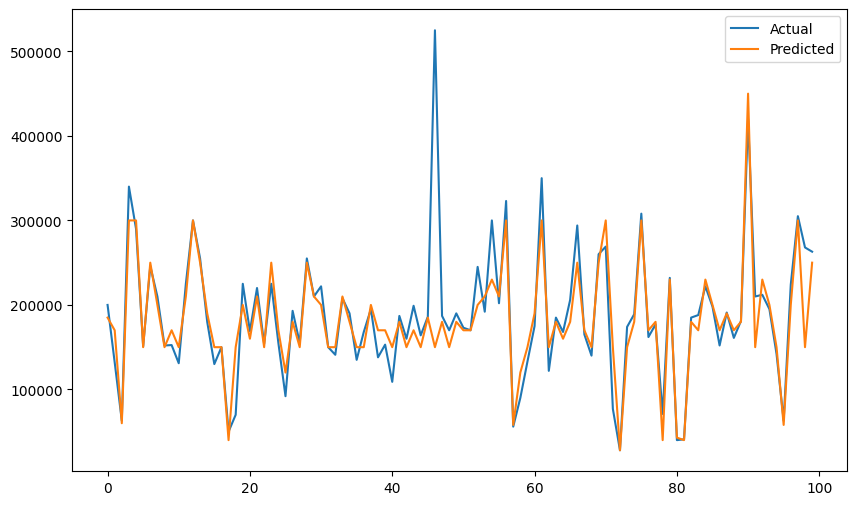

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df_7[:100])
plt.legend(['Actual' , 'Predicted'])

In [40]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

1020174709.8811594

In [41]:
rsq = r2_score(y_test,y_pred)
rsq

0.7987611249051229

In [42]:
df_8 = df_7.sort_values(by = ['Y_pred'], ascending = False)
df_8.head(5)

,Y_test,Y_pred
448,449000,450000
501,450000,450000
1022,420000,450000
908,450000,450000
90,420000,450000


# SVM

In [43]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
svm.score(x_train, y_train)

0.1058118715485521

In [44]:
svm.score(x_test , y_test)

0.09225988310952749

In [45]:
y_pred = svm.predict(x_test)
df_9 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_9.head(10)

,Y_test,Y_pred
0,200000,182911.943599
1,132000,181068.575529
2,63000,175921.185210
3,340000,191555.535604
4,290000,188710.509933
5,151000,180270.110213
6,246000,188883.719293
7,210000,183200.097356
8,152000,180052.594491
9,152500,180920.371031


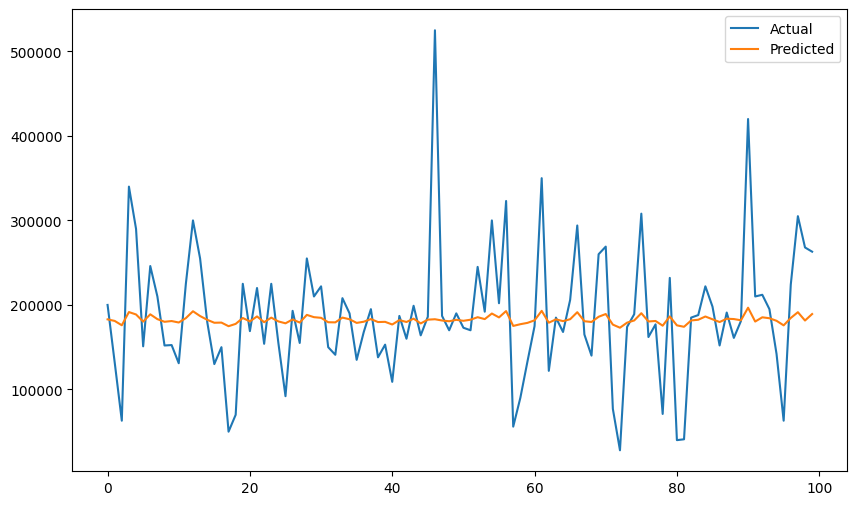

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df_9[:100])
plt.legend(['Actual' , 'Predicted'])

In [47]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

4601762507.167789

In [48]:
rsq = r2_score(y_test,y_pred)
rsq

0.09225988310952749

In [49]:
df_10 = df_9.sort_values(by = ['Y_pred'], ascending = False)
df_10.head(5)

,Y_test,Y_pred
319,490000,204919.468108
501,450000,202811.497131
1309,427000,201964.549850
908,450000,201453.375696
142,440000,201130.684725


# Gain Chart

In [51]:
y_test_methods = [df_2['Y_test'], df_4['Y_test'], df_6['Y_test'], df_8['Y_test']]
y_pred_methods = [df_2['Y_pred'], df_4['Y_pred'], df_6['Y_pred'], df_8['Y_pred']]

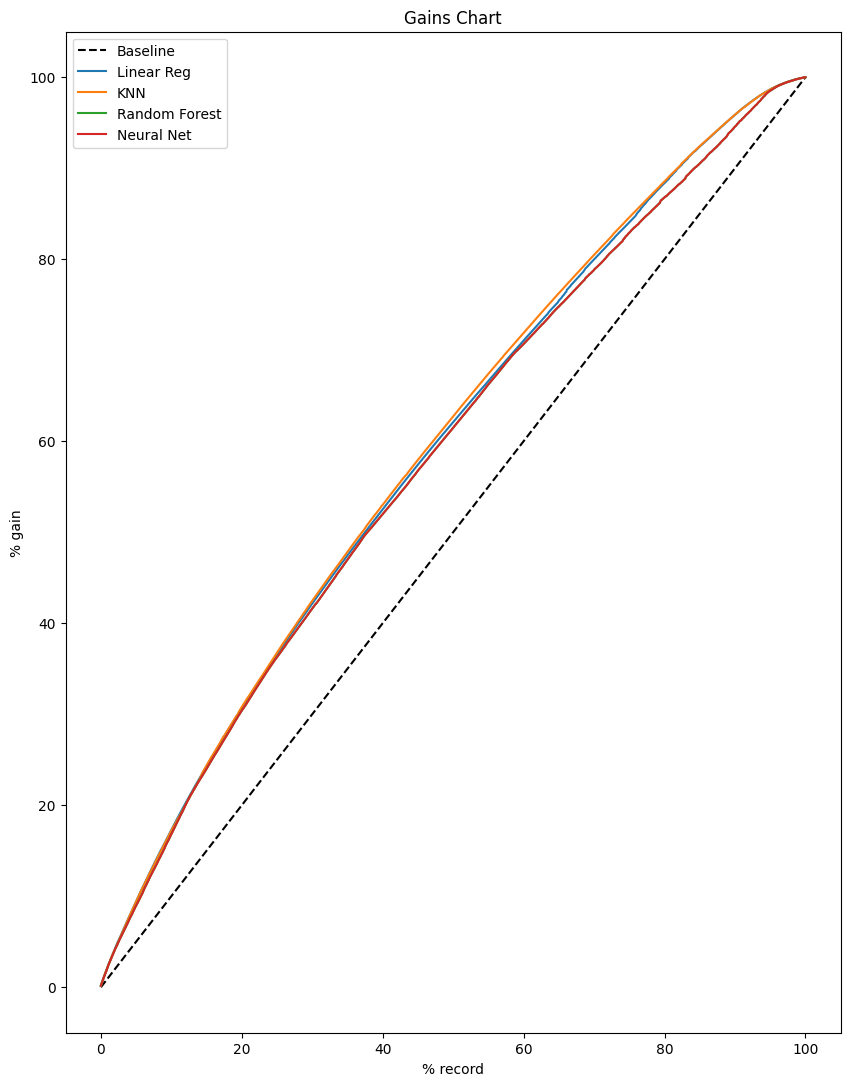

In [52]:
def cumulative_gain(y_test, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]
    sorted_labels = y_test.iloc[sorted_indices]
    cumulative_gains = np.cumsum(sorted_labels) / np.sum(sorted_labels)
    return cumulative_gains

# calculate the cumulative gain for each method
gains = []
for i in range(len(y_test_methods)):
    gains.append(cumulative_gain(y_test_methods[i], y_pred_methods[i]))

# plot the cumulative gain chart
plt.figure(figsize=(10, 13))
plt.plot(np.linspace(0, 100, len(y_test_methods[0])), np.linspace(0, 100, len(y_test_methods[0])), 'k--', label='Baseline')
for i in range(len(gains)):
    plt.plot(np.linspace(0, 100, len(y_test_methods[0])), gains[i]*100, label=f'{["Linear Reg", "KNN", "Random Forest", "Neural Net", "SVM"][i]}')
plt.xlabel('% record')
plt.ylabel('% gain')
plt.title('Gains Chart')
plt.legend()
plt.show()